<a href="https://colab.research.google.com/github/SaMoAAlamdari/Stock-Analysis-and-Portfolio-Optimization/blob/main/StockMarketPortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Analysis and Portfolio Optimization

This project provides tools for downloading historical stock data, visualizing trends, calculating statistics, and performing portfolio optimization using the Sharpe Ratio.

## Introduction

In this project, we will analyze historical stock data for multiple companies, visualize trends over time, calculate important financial statistics, and perform portfolio optimization to maximize returns based on the Sharpe Ratio. This analysis helps in understanding the performance of stocks and making informed investment decisions.

## Setup and Installation

### Requirements

- Python 3.7+
- pandas
- yfinance
- matplotlib
- seaborn
- numpy

### Installation

Install the required libraries using pip:

```bash
pip install pandas yfinance matplotlib seaborn numpy


## Downloading Data
### Define the Time Period and Import Libraries

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



### Define the Time Period for the Data

In [3]:
# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")


### List of Stock Tickers

In [4]:
# List of stock tickers to download (Tesla, Google, Amazon, Berkshire Hathaway)
tickers = ['TSLA', 'GOOGL', 'AMZN', 'BRK-B']

### Download Historical Market Data

In [5]:
# Download historical market data
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

### Reset Index to Bring 'Date' into the Columns for the Melt Function

In [6]:
# Reset index to bring 'Date' into the columns for the melt function
data = data.reset_index()

### Check Columns

In [7]:
# Check columns
print(data.columns)

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'BRK-B'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'TSLA'),
            (    'Close',  'AMZN'),
            (    'Close', 'BRK-B'),
            (    'Close', 'GOOGL'),
            (    'Close',  'TSLA'),
            (     'High',  'AMZN'),
            (     'High', 'BRK-B'),
            (     'High', 'GOOGL'),
            (     'High',  'TSLA'),
            (      'Low',  'AMZN'),
            (      'Low', 'BRK-B'),
            (      'Low', 'GOOGL'),
            (      'Low',  'TSLA'),
            (     'Open',  'AMZN'),
            (     'Open', 'BRK-B'),
            (     'Open', 'GOOGL'),
            (     'Open',  'TSLA'),
            (   'Volume',  'AMZN'),
            (   'Volume', 'BRK-B'),
            (   'Volume', 'GOOGL'),
            (   'Volume',  'TSLA')],
           names=['Price', 'Ticker'])


### Flatten MultiIndex Columns

In this step, we take the DataFrame `data` which has a MultiIndex column structure after downloading the stock data. MultiIndex means that each column is represented by a tuple of levels (for example, `('Adj Close', 'TSLA')`). This can make data manipulation more complex. Therefore, we flatten the MultiIndex into a single level by joining the levels with an underscore.

This line of code:

- Iterates over each column in the DataFrame.

- Joins the levels of the MultiIndex with an underscore _.

- If a column has only one level (i.e., it doesn’t have a second level), it simply takes that level.

The result is that the columns are now simple, single-level names which are easier to work with in subsequent operations.

In [8]:
# Flatten MultiIndex columns
data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in data.columns.values]

### Check Columns After Flattening

To ensure that our columns have been properly flattened and are now easier to work with, we print the column names. This helps us verify that the transformation was successful.

This step is crucial for debugging and confirming that the DataFrame structure is as expected before proceeding with further operations.

In [9]:
# Check columns after flattening
print(data.columns)


Index(['Date', 'Adj Close_AMZN', 'Adj Close_BRK-B', 'Adj Close_GOOGL',
       'Adj Close_TSLA', 'Close_AMZN', 'Close_BRK-B', 'Close_GOOGL',
       'Close_TSLA', 'High_AMZN', 'High_BRK-B', 'High_GOOGL', 'High_TSLA',
       'Low_AMZN', 'Low_BRK-B', 'Low_GOOGL', 'Low_TSLA', 'Open_AMZN',
       'Open_BRK-B', 'Open_GOOGL', 'Open_TSLA', 'Volume_AMZN', 'Volume_BRK-B',
       'Volume_GOOGL', 'Volume_TSLA'],
      dtype='object')


### Melt the DataFrame

In this step, we transform the DataFrame from a wide format to a long format. This means converting columns into rows, creating a more compact and manageable structure for further analysis. Each row will represent a unique combination of Date, Ticker, and attributes.

This line of code:

- Uses the melt function to unpivot the DataFrame.

- id_vars=['Date'] specifies that the 'Date' column should remain as-is.

- var_name='Variable' names the new column that will hold the previous columns' names (like 'Adj Close_TSLA').

- value_name='Value' names the new column that will hold the values.

The result is a long DataFrame where each row is a unique combination of 'Date', 'Ticker', and 'Attribute' (like 'Adj Close', 'Volume', etc.).


In [10]:
# Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name='Variable', value_name='Value')

### Extract 'Attribute' and 'Ticker' from 'Variable'

After melting the DataFrame, we need to separate the 'Attribute' (e.g., 'Adj Close', 'Volume') and the 'Ticker' (e.g., 'TSLA', 'GOOGL') from the combined 'Variable' column. We use the `str.extract` method with a regular expression to achieve this.

This line of code:

- Uses the str.extract method to split the 'Variable' column into 'Attribute' and 'Ticker'.

- The regular expression r'([a-zA-Z ]+)_([A-Z\-]+)' matches and captures groups of letters and spaces before the underscore as 'Attribute' and groups of uppercase letters and hyphens after the underscore as 'Ticker'.

- Drops the original 'Variable' column as it is no longer needed.

The result is a DataFrame where 'Attribute' and 'Ticker' are now separate columns, making the data easier to work with.


In [11]:
# Extract 'Attribute' and 'Ticker' from 'Variable'
data_melted[['Attribute', 'Ticker']] = data_melted['Variable'].str.extract(r'([a-zA-Z ]+)_([A-Z\-]+)')
data_melted = data_melted.drop('Variable', axis=1)

### Pivot the Melted DataFrame

To make our data analysis easier, we pivot the melted DataFrame so that the attributes (like Open, High, Low, etc.) become columns. This step transforms the DataFrame into a more familiar table format where each row represents a unique combination of Date and Ticker, and each attribute (price, volume, etc.) is a separate column.

This line of code:

- Uses the pivot_table method to reshape the DataFrame.

- index=['Date', 'Ticker'] specifies that each unique combination of Date and Ticker will be an index.

- columns='Attribute' makes each attribute (like Open, High, Low) a column in the new DataFrame.

- values='Value' indicates that the cell values in the pivot table come from the 'Value' column.

- aggfunc='first' is used as the aggregation function, ensuring that if there are duplicate combinations, the first occurrence is taken.

The result is a pivoted DataFrame where each row corresponds to a specific Date and Ticker, and the columns represent different attributes of the stock data.


In [12]:
# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

### Reset Index to Turn Multi-Index into Columns

After pivoting the DataFrame, the index consists of a MultiIndex (Date and Ticker). To simplify further data manipulation and analysis, we reset the index to turn these multi-index levels into regular columns.

This line of code:

- Uses the reset_index method to convert the MultiIndex into regular columns.

- Ensures that 'Date' and 'Ticker' are now standard columns in the DataFrame, making it easier to work with.

- The print(stock_data.head()) statement is used to check the first few rows of the transformed DataFrame, ensuring that the operation was successful.

The result is a DataFrame where the index has been flattened and 'Date' and 'Ticker' are now part of the columns, facilitating further analysis.

In [13]:
# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())


Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2023-12-18   AMZN  154.070007  154.070007  154.850006  150.050003   
1         2023-12-18  BRK-B  359.649994  359.649994  361.140015  357.000000   
2         2023-12-18  GOOGL  135.309494  135.800003  137.149994  132.429993   
3         2023-12-18   TSLA  252.080002  252.080002  258.739990  251.360001   
4         2023-12-19   AMZN  153.789993  153.789993  155.119995  152.690002   

Attribute        Open       Volume  
0          150.559998   62512800.0  
1          357.420013    4526400.0  
2          132.630005   32258000.0  
3          253.779999  116416500.0  
4          154.399994   43171300.0  


### Convert 'Date' Column to Datetime Format

To ensure that the 'Date' column is in a suitable format for time series analysis and visualization, we convert it to a datetime format using the `pd.to_datetime` function.

This line of code:

- Uses the pd.to_datetime function to convert the 'Date' column to a datetime object.

- Ensures that the 'Date' column is in a standardized format, which is essential for plotting and performing date-related operations.

The result is a DataFrame where the 'Date' column is in datetime format, making it ready for further time series analysis.


In [14]:
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

## Visualizing Stock Prices

### Plot Adjusted Close Price for Each Ticker

In this step, we visualize the adjusted close prices for each stock ticker over the specified time period. We use `matplotlib` and `seaborn` to create a line plot, which allows us to see the trends and compare the performance of different stocks.

This block of code:

- Sets up the plot with a figure size of 16 by 8 inches.

- Applies a white grid style to the plot for better readability.

- Uses sns.lineplot to plot the adjusted close prices (Adj Close) for each ticker against time (Date).

- Adds markers ('o') to each data point for clarity.

- Sets the title, x-axis, and y-axis labels with appropriate font sizes.

- Adds a legend to distinguish between different tickers.

- Enables the grid and rotates the x-axis labels by 45 degrees for better readability.

- Finally, displays the plot.

The resulting plot provides a clear and detailed visualization of how the adjusted close prices of the selected stocks have changed over time.


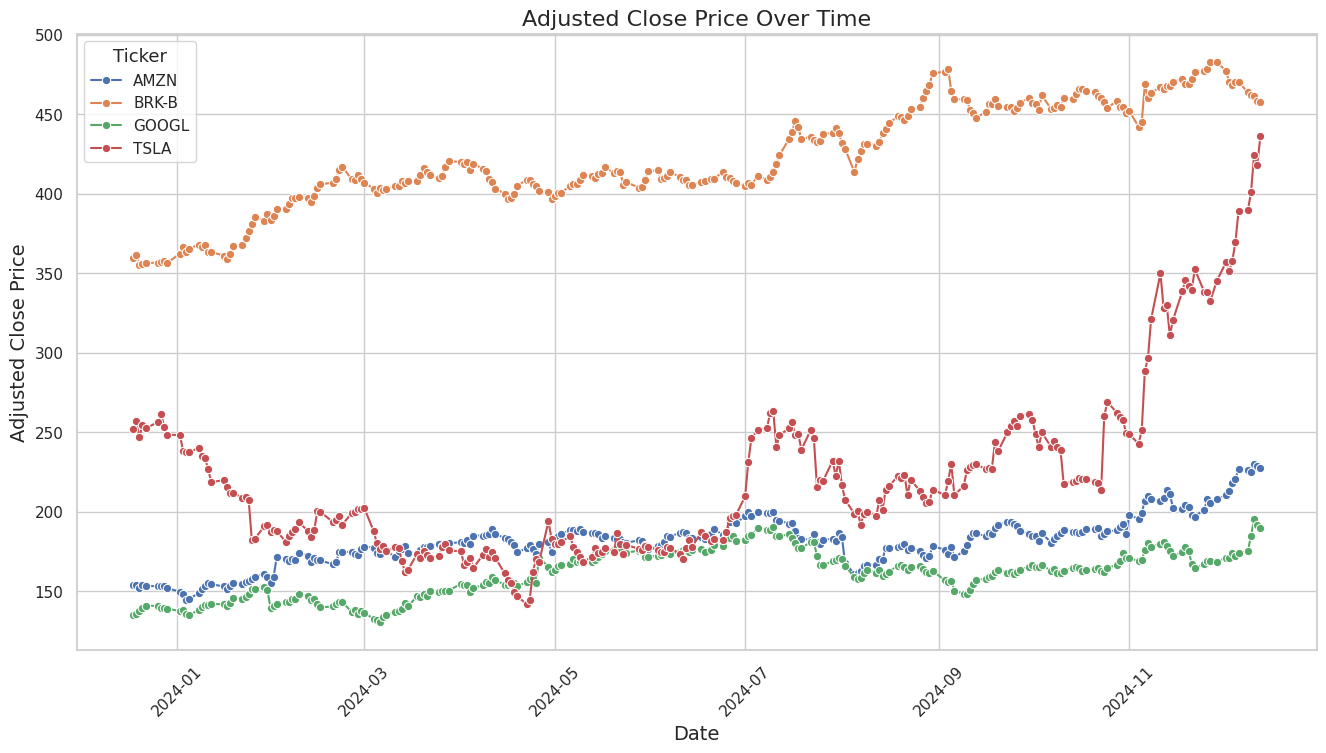

In [15]:
# Plot Adjusted Close price for each ticker
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')
sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Moving Averages

### Calculate 50-Day and 200-Day Moving Averages for Each Ticker

In this step, we calculate the 50-day and 200-day moving averages for each stock ticker. Moving averages help smooth out price data to identify trends over time. The 50-day moving average is considered short-term, while the 200-day moving average is long-term.

This block of code:

- Sets the short-term (50 days) and long-term (200 days) window for moving averages.

- Sets the 'Date' column as the index and gets the unique tickers in the data.

- Iterates over each ticker, calculates the 50-day and 200-day moving averages, and stores them in new columns (50_MA and 200_MA).

- Creates two plots for each ticker: one for the adjusted close prices and moving averages, and another for the volume traded.

- Uses plt.plot for the line plot of adjusted close prices and moving averages, and plt.bar for the volume traded.

- Sets titles, labels, legends, grids, and formats the plots for better readability.

The resulting plots provide visual insights into the price trends and trading volumes for each stock, helping in technical analysis and decision

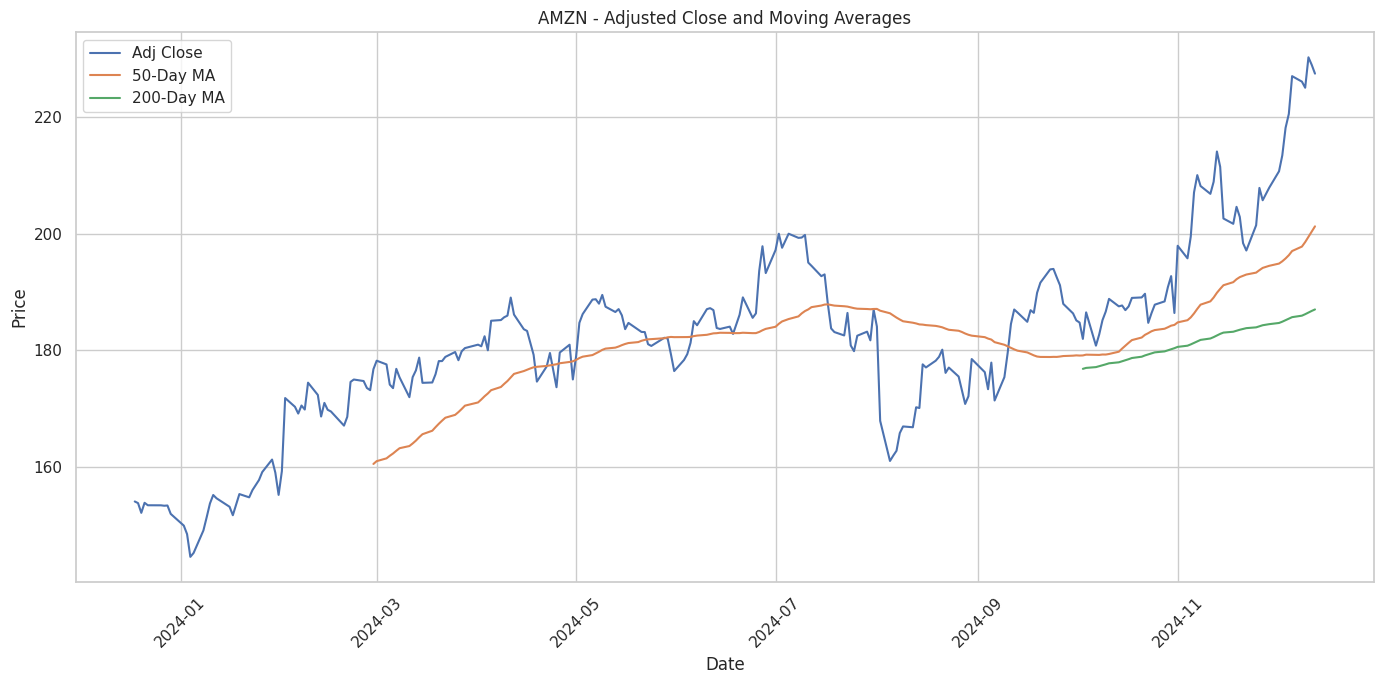

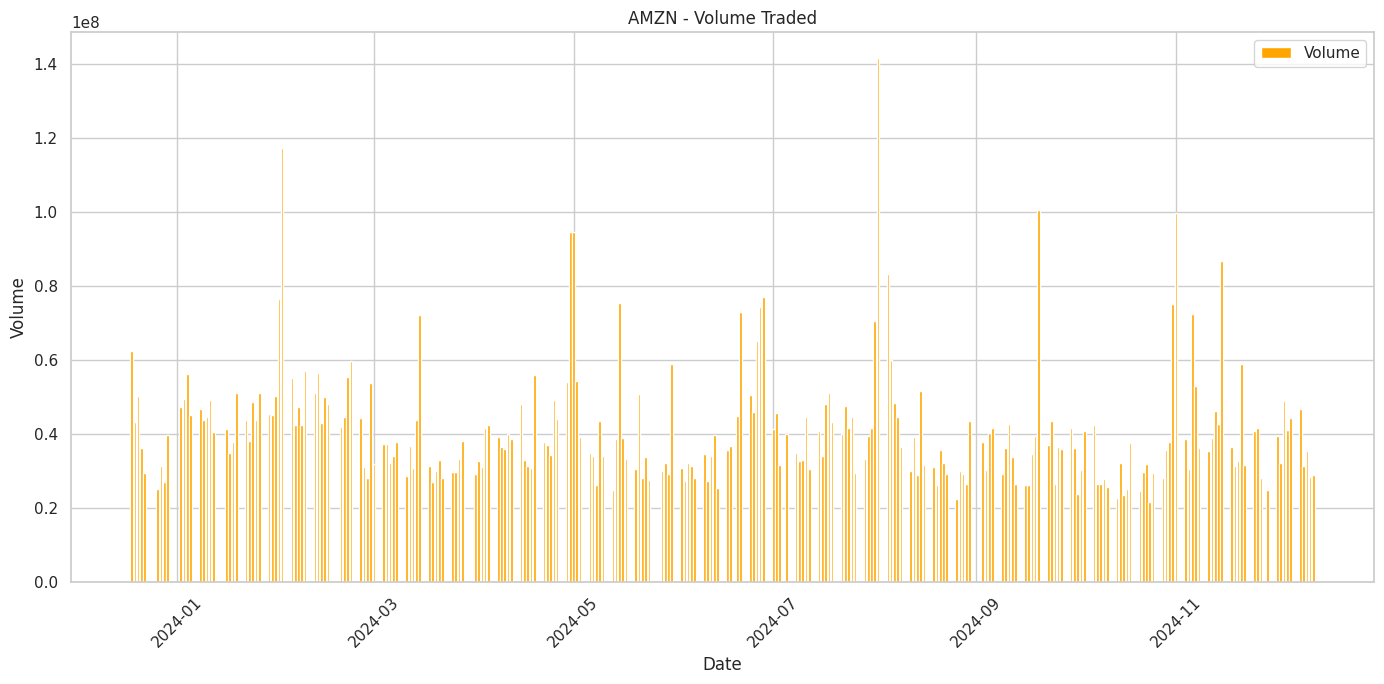

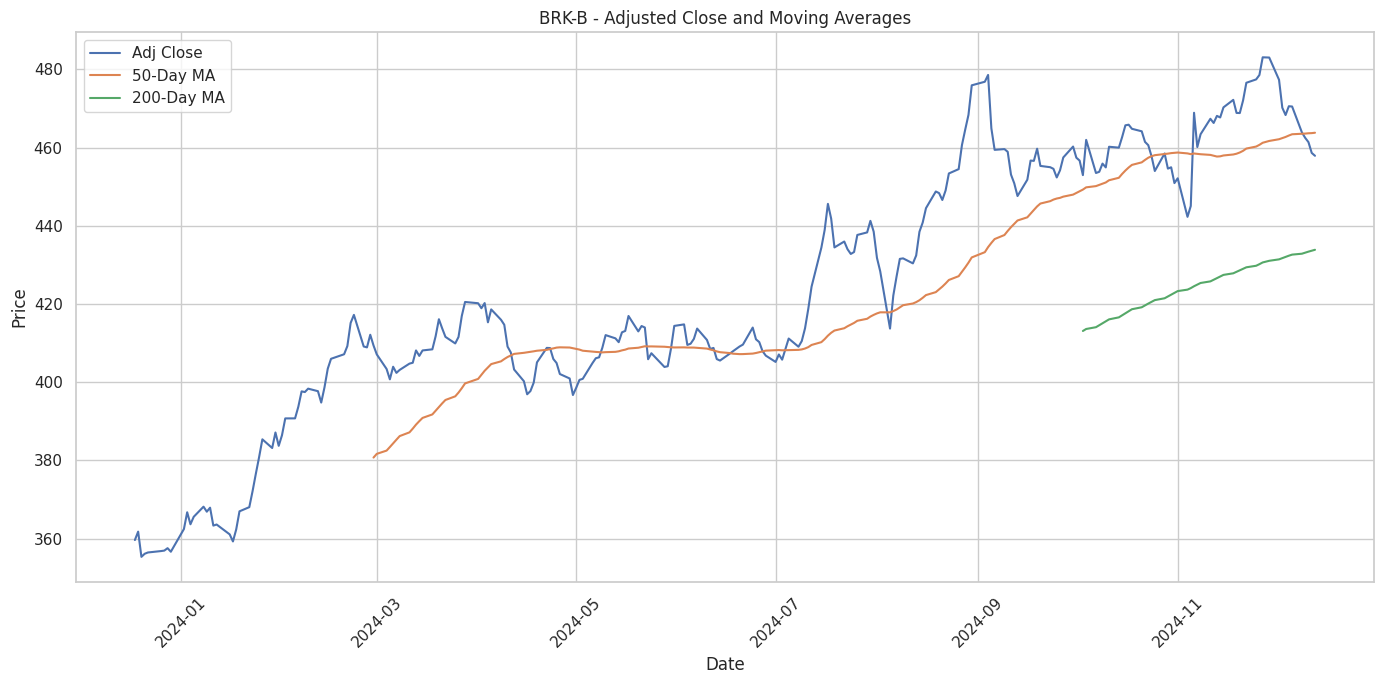

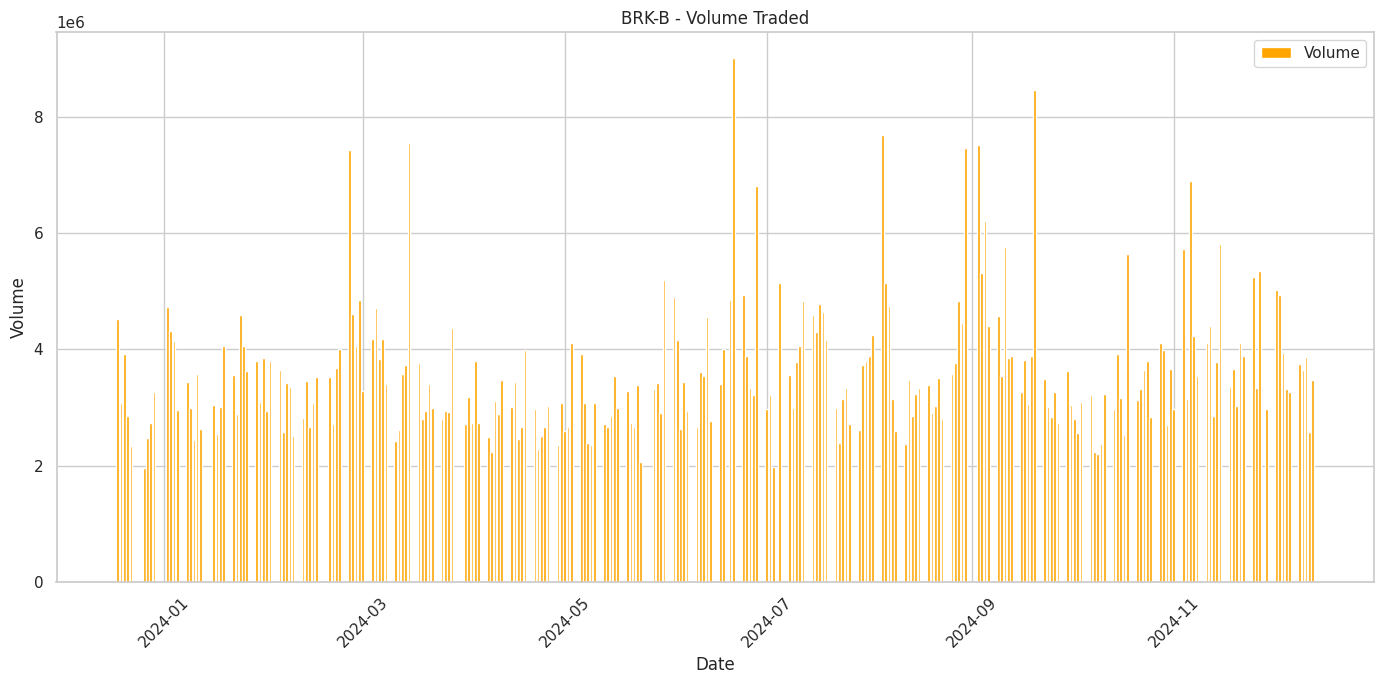

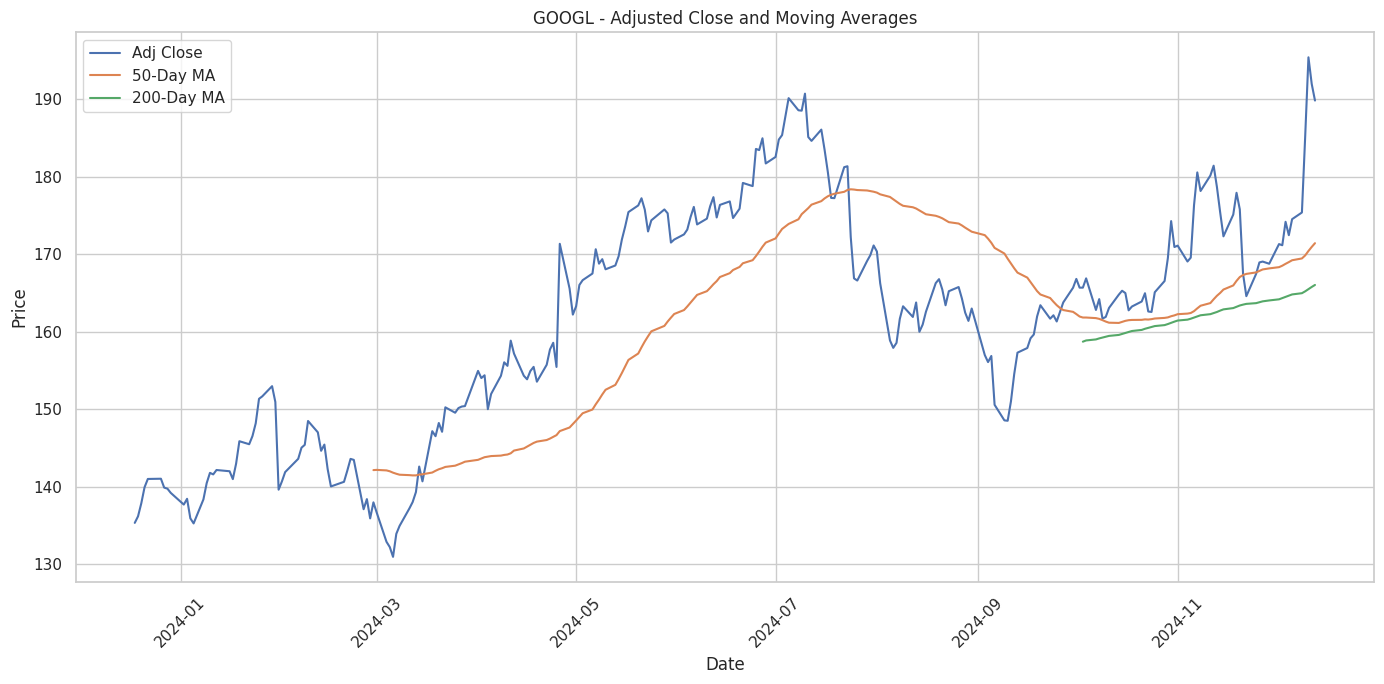

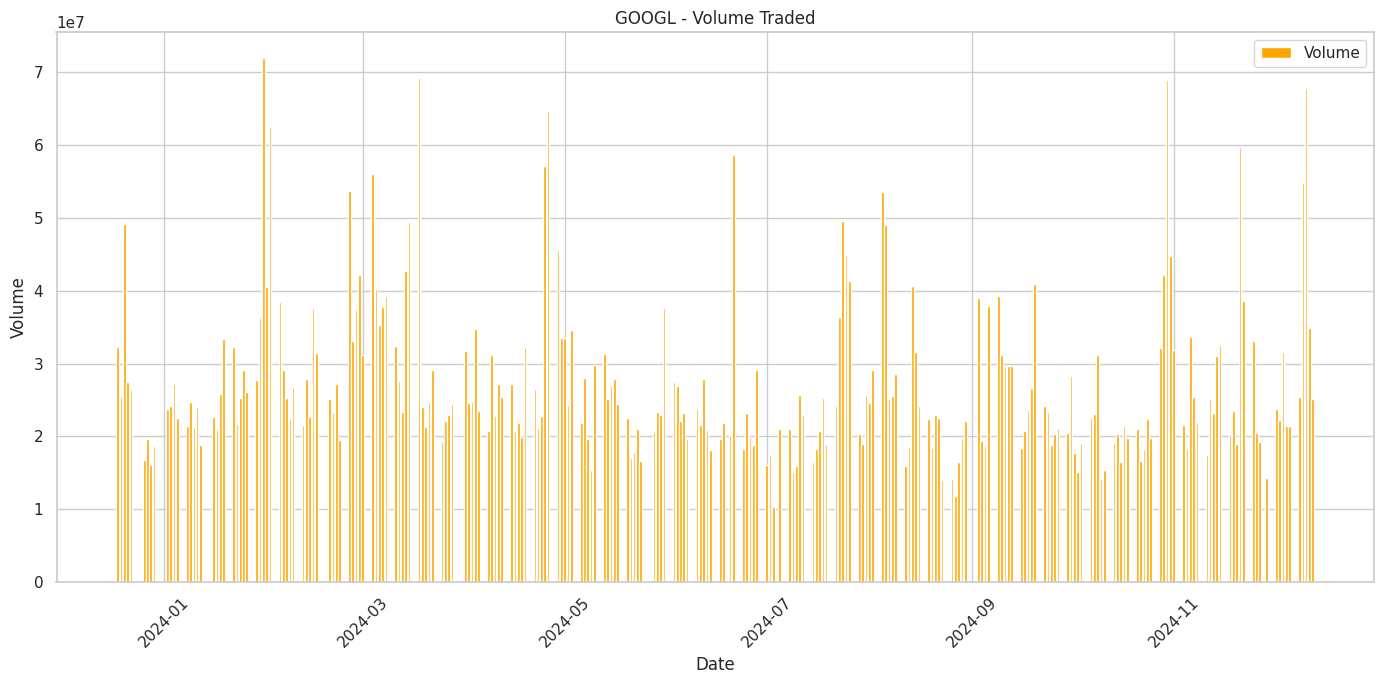

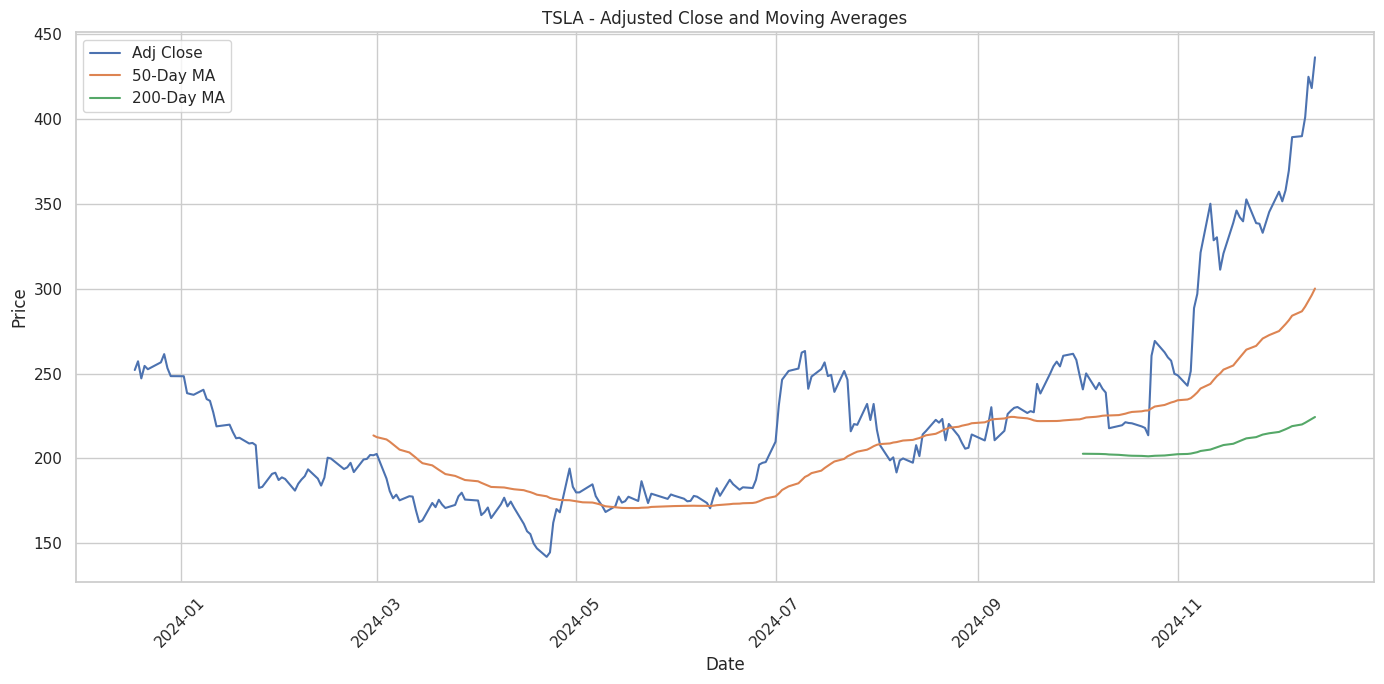

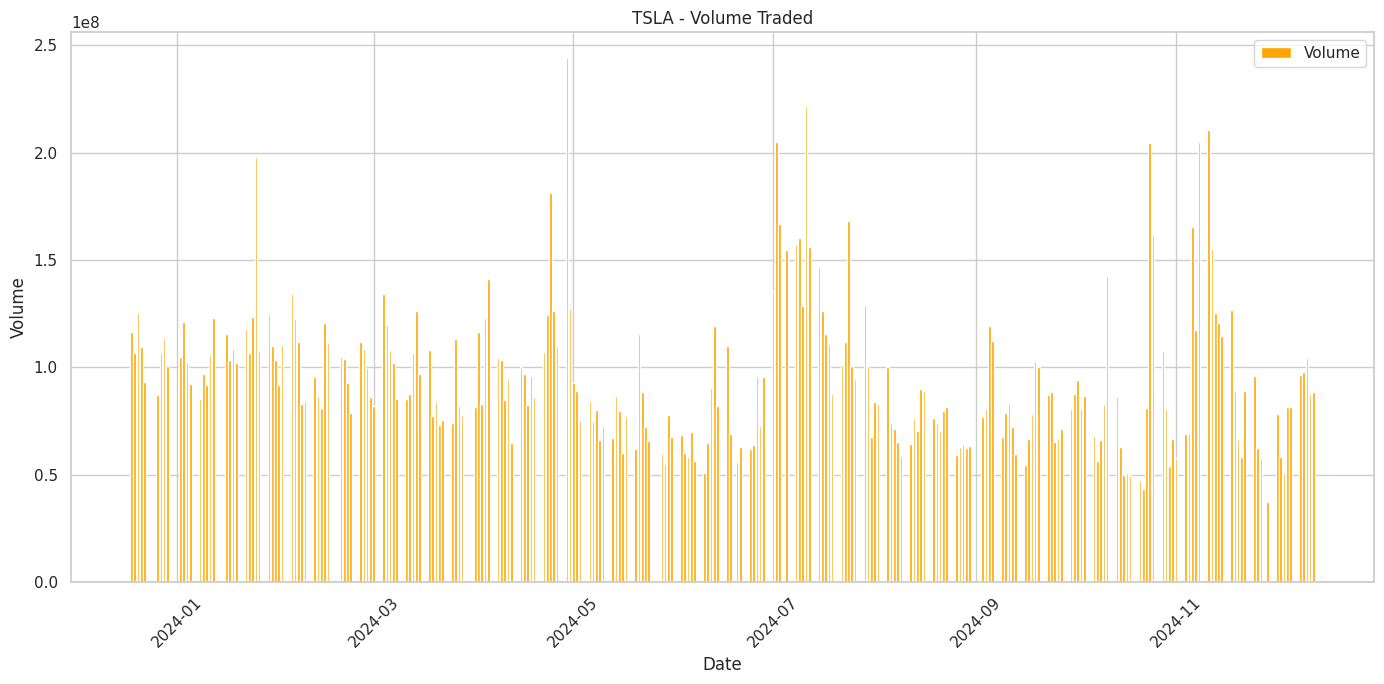

In [16]:
# Calculate 50-day and 200-day moving averages for each ticker
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    # Plot Adjusted Close and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Volume Traded
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Daily Returns

### Calculate and Plot Daily Returns

In this step, we calculate the daily returns for each stock and visualize their distribution. Daily returns provide insights into the daily price changes and are useful for understanding the volatility of stocks.

This block of code:

- Calculates the daily returns for each stock ticker using the pct_change method, which computes the percentage change between the current and prior values.

- Adds the daily return values to a new column named 'Daily Return' in the DataFrame.

- Sets up a plot with a figure size of 14 by 7 inches.

- Iterates over each ticker, creating a histogram of daily returns with 50 bins and a kernel density estimate (kde).

- Adds titles, axis labels, legends, and a grid to the plot for better readability.

- Uses plt.tight_layout() to ensure the plot elements fit within the figure area.

The resulting plot displays the distribution of daily returns for each stock, allowing us to compare their volatility and understand their risk characteristics.

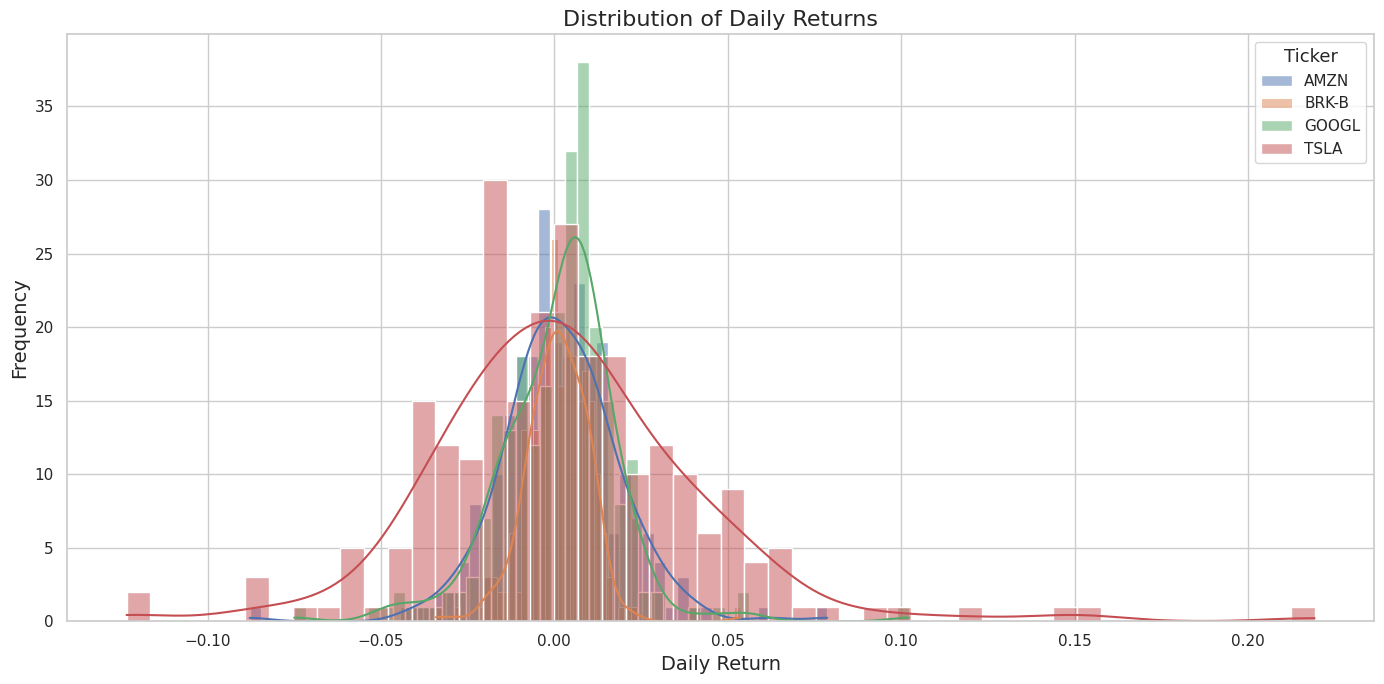

In [17]:
# Calculate Daily Returns
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

# Plot Distribution of Daily Returns
plt.figure(figsize=(14, 7))

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Matrix

### Calculate and Plot Correlation Matrix of Daily Returns

In this step, we calculate the correlation matrix of daily returns for the stock tickers. The correlation matrix helps us understand how the daily returns of different stocks are related to each other. We then visualize this correlation matrix using a heatmap.

This block of code:

- Creates a pivot table of daily returns with 'Date' as the index and stock tickers as columns.

- Calculates the correlation matrix of the daily returns using the corr method, which shows how the returns of different stocks are correlated.

- Sets up a plot with a figure size of 12 by 10 inches.

- Uses sns.heatmap to create a heatmap of the correlation matrix, with annotations, a color map (coolwarm), line widths, and formatted annotations.

- Adds a title and rotates the x and y ticks for better readability.

- Uses plt.tight_layout() to ensure the plot elements fit within the figure area.

The resulting heatmap provides a visual representation of the correlation between the daily returns of the stocks, helping us understand their relationships and potential diversification benefits.

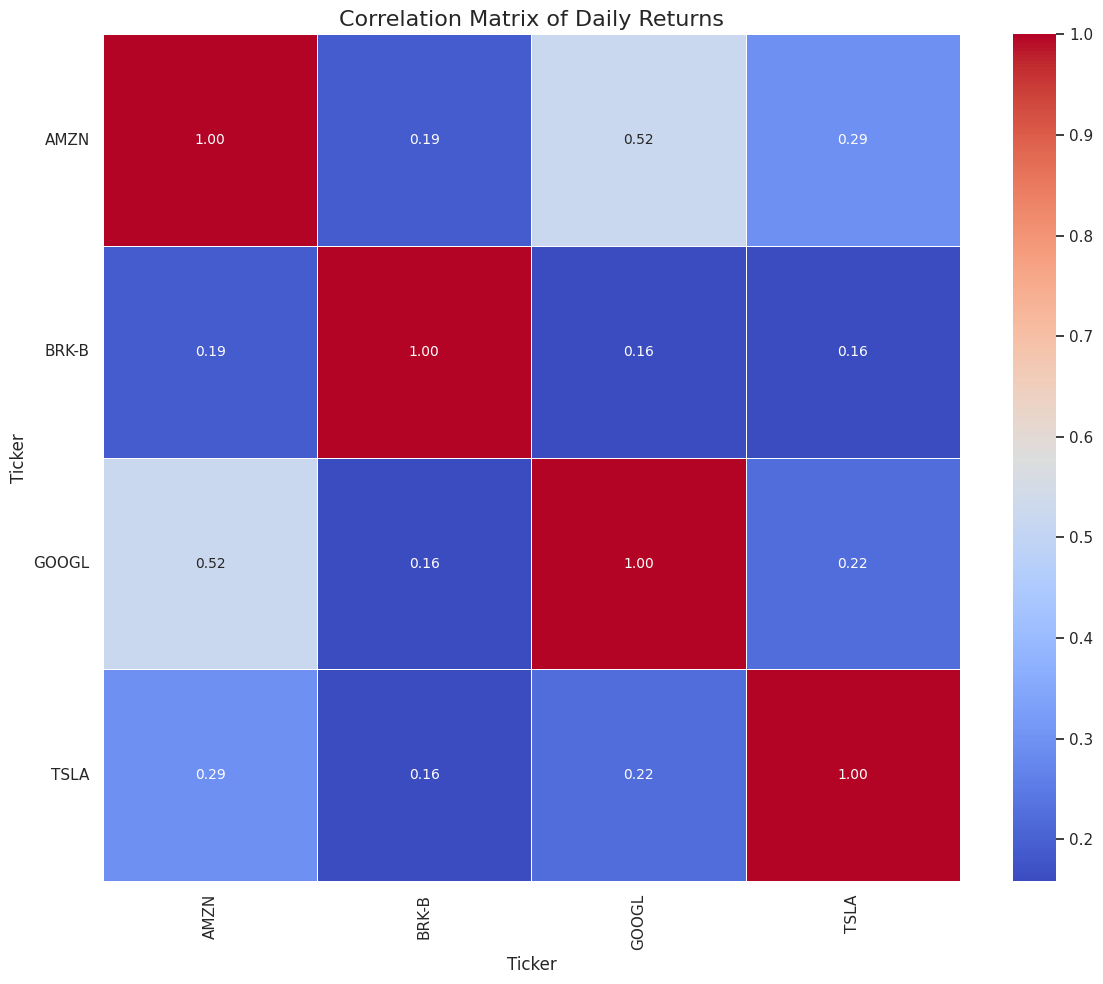

In [18]:
# Calculate and plot Correlation Matrix of Daily Returns
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Portfolio Optimization

### Calculate Annualized Expected Returns and Volatility

In this step, we calculate the annualized expected returns and volatility for each stock. Expected returns give us an estimate of the average return we can expect from the stocks over a year, while volatility measures the risk or the fluctuations in the stock's returns.

This block of code:

- Calculates the mean of daily returns for each stock and multiplies by the number of trading days to annualize the expected returns.

- Calculates the standard deviation of daily returns for each stock and multiplies by the square root of the number of trading days to annualize the volatility.

- Creates a DataFrame stock_stats to store the expected returns and volatility for each stock.

The resulting DataFrame provides a clear view of the annualized expected returns and volatility for the stocks, which are essential metrics for portfolio optimization and risk assessment.

In [19]:
# Calculate annualized expected returns and volatility
expected_returns = daily_returns.mean() * len(daily_returns)
volatility = daily_returns.std() * np.sqrt(len(daily_returns))

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats


,Expected Return,Volatility
Ticker,,
AMZN,0.427425,0.274612
BRK-B,0.251965,0.144182
GOOGL,0.376247,0.274849
TSLA,0.735769,0.619336


## Portfolio Optimization

### Define Function to Calculate Portfolio Performance

First, we define a function to calculate the portfolio's expected return and volatility based on given weights, expected returns, and the covariance matrix.

In [20]:
# Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility


### Simulate Portfolios and Calculate Sharpe Ratios

In this step, we simulate a large number of portfolios to analyze their performance based on different weight combinations of the stocks. We calculate the expected return, volatility, and Sharpe ratio for each simulated portfolio. The Sharpe ratio helps us understand the return per unit of risk, aiding in identifying the optimal portfolio.

This block of code:

- Defines the number of portfolios to simulate (num_portfolios).

- Initializes arrays (results and ws) to store the results of each portfolio simulation.

- Calculates the annualized covariance matrix of the daily returns.

- Sets a random seed for reproducibility to ensure consistent results across runs.

- Runs a loop to simulate num_portfolios:

  - Generates random weights for each stock and normalizes them.

  - Calculates the portfolio's expected return and volatility using these weights.

  - Computes the Sharpe ratio (expected return divided by volatility).

  - Stores the results and weights of each simulated portfolio.

The resulting arrays results and ws contain the performance metrics and weights of all simulated portfolios, which will be used for further analysis and visualization.

In [21]:
# Number of portfolios to simulate
num_portfolios = 10000

# Arrays to store the results
results = np.zeros((3, num_portfolios))
ws = np.zeros((num_portfolios, len(unique_tickers)))

# Annualized covariance matrix
cov_matrix = daily_returns.cov() * len(daily_returns)

# Set random seed for reproducibility
np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Sharpe Ratio
    ws[i] = weights


### Plot Efficient Frontier

The Efficient Frontier is a graphical representation of optimal portfolios that offer the highest expected return for a defined level of risk (volatility) or the lowest risk for a given level of return. In this step, we plot the Efficient Frontier for the simulated portfolios to visualize these optimal portfolios.

This block of code:

- Sets up a plot with a figure size of 10 by 7 inches.

- Uses plt.scatter to create a scatter plot where each point represents a simulated portfolio.

- The x-axis shows the portfolio volatility (standard deviation), and the y-axis shows the expected return.

- Colors the points based on the Sharpe ratio using a color map (YlGnBu), with the color intensity indicating the Sharpe ratio.

- Adds a title, labels for the x and y axes, a color bar to explain the color coding, and a grid for better readability.

- Finally, displays the plot.

The resulting plot shows the Efficient Frontier, illustrating the trade-off between risk and return for the simulated portfolios and highlighting the portfolios with the highest Sharpe ratios.

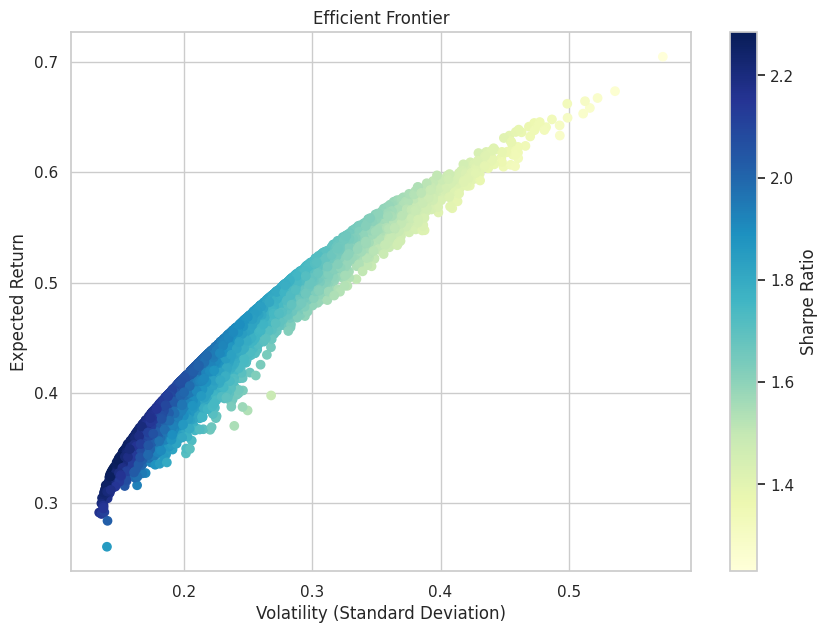

In [22]:
# Plot Efficient Frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()


### Identify Portfolio with Maximum Sharpe Ratio

In this step, we identify the portfolio with the maximum Sharpe ratio from the simulated portfolios. The Sharpe ratio measures the performance of the portfolio relative to its risk, helping us find the optimal portfolio.

This block of code:

- Uses np.argmax to find the index of the portfolio with the highest Sharpe ratio in the results array.

- Retrieves the expected return, volatility, and Sharpe ratio for this optimal portfolio using the identified index.

- Outputs these values, which represent the portfolio with the maximum Sharpe ratio.

The result gives us the key performance metrics of the portfolio that offers the best return per unit of risk, guiding investment decisions towards the most efficient portfolio.


In [23]:
# Identify portfolio with maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.32788194576513296, 0.1435242828796296, 2.284505027209366)

### Weights of the Portfolio with Maximum Sharpe Ratio

After identifying the portfolio with the maximum Sharpe ratio, we extract the weights of the stocks in this portfolio. These weights indicate the proportion of each stock in the optimal portfolio.

This block of code:

- Retrieves the weights of the stocks in the portfolio with the maximum Sharpe ratio using the index max_sharpe_idx.

- Creates a DataFrame portfolio_weights_df to store the tickers and their corresponding weights.

The resulting DataFrame provides a clear view of how much of each stock is included in the optimal portfolio, helping investors allocate their investments according to the most efficient portfolio.

In [24]:
# Weights of the portfolio with maximum Sharpe Ratio
max_sharpe_weights = ws[max_sharpe_idx]

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df


,Ticker,Weight
0,AMZN,0.178025
1,BRK-B,0.615880
2,GOOGL,0.153061
3,TSLA,0.053034


### Identify Top 3 Portfolios with Highest Sharpe Ratio

In this step, we identify the top three portfolios with the highest Sharpe ratios from the simulated portfolios. This allows us to compare the performance of the best portfolios based on their return-to-risk ratio.

This block of code:

- Initializes arrays to store the returns, volatility, and Sharpe ratios for the top three portfolios.

- Uses np.argpartition to find the indices of the top three Sharpe ratios.

- Iterates over these indices to retrieve and store the corresponding returns, volatility, and Sharpe ratios in the initialized arrays.

The result gives us the key performance metrics of the top three portfolios with the highest Sharpe ratios, allowing us to compare and analyze the best-performing portfolios.


In [25]:
# Identify top 3 portfolios with highest Sharpe Ratio
max3_sharpe_return = np.zeros((1, 3))
max3_sharpe_volatility = np.zeros((1, 3))
max3_sharpe_ratio = np.zeros((1, 3))

max3_sharpe_idx = np.argpartition(results[2], -3)[-3:]

for i in range(len(max3_sharpe_idx)):
    max3_sharpe_return[0][i] = results[0, max3_sharpe_idx[i]]
    max3_sharpe_volatility[0][i] = results[1, max3_sharpe_idx[i]]
    max3_sharpe_ratio[0][i] = results[2, max3_sharpe_idx[i]]

max3_sharpe_return, max3_sharpe_volatility, max3_sharpe_ratio

(array([[0.32921421, 0.32527378, 0.32788195]]),
 array([[0.14419411, 0.14242024, 0.14352428]]),
 array([[2.28313217, 2.28390133, 2.28450503]]))

### Weights of the Top 3 Portfolios

In this step, we extract the weights of the stocks for the top three portfolios with the highest Sharpe ratios. These weights show how the stocks are allocated in each of these optimal portfolios.

This block of code:

- Initializes an array to store the weights of the top three portfolios.

- Iterates over the indices of the top three portfolios to extract and store their respective weights.

- Creates a DataFrame portfolio_weights_df to organize and display the tickers and their weights for each of the top three portfolios.

The resulting DataFrame provides a clear and organized view of the stock allocation in each of the top-performing portfolios, helping investors understand how to allocate their investments for optimal performance.

In [26]:
# Weights of the top 3 portfolios
max3_sharpe_weights = np.zeros((3, len(unique_tickers)))

for i in range(len(max3_sharpe_idx)):
    max3_sharpe_weights[i] = ws[max3_sharpe_idx[i]]

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weights for first portfolio': max3_sharpe_weights[0],
    'Weights for second portfolio': max3_sharpe_weights[1],
    'Weights for third portfolio': max3_sharpe_weights[2]
})

portfolio_weights_df


,Ticker,Weights for first portfolio,Weights for second portfolio,Weights for third portfolio
0,AMZN,0.185789,0.166440,0.178025
1,BRK-B,0.603789,0.633440,0.615880
2,GOOGL,0.158968,0.146621,0.153061
3,TSLA,0.051455,0.053499,0.053034


## Conclusion

In this project, we successfully analyzed historical stock data, visualized key financial trends, and performed portfolio optimization using the Sharpe Ratio. The insights gained from the data analysis and visualization help in understanding the performance of different stocks, while the portfolio optimization process assists in making informed investment decisions to maximize returns and manage risk.

We utilized various Python libraries such as `pandas`, `yfinance`, `matplotlib`, `seaborn`, and `numpy` to achieve these goals. The comprehensive approach provided a thorough understanding of stock market behavior and the importance of diversification in investment portfolios.

Future enhancements could include incorporating additional financial metrics, automating data updates, and extending the analysis to other asset classes such as bonds or cryptocurrencies.

By leveraging these tools and techniques, investors can make data-driven decisions to optimize their portfolios and achieve better financial outcomes.
